In [1]:
project_name = 'kornet'
import os
#get current working directory
cwd = os.getcwd()
git_dir = cwd.split(project_name)[0] + project_name
import sys
sys.path.append(git_dir)


vone_dir = f'{cwd.split(project_name)[0]}vonenet'
#cornet_dir = '/user_data/vayzenbe/GitHub_Repos/CORnet'
vit_dir = f'{cwd.split(project_name)[0]}Cream/EfficientViT'
baby_dir = f'{cwd.split(project_name)[0]}multimodal-baby'
deepdive = f'{cwd.split(project_name)[0]}DeepDive'
sys.path.insert(1, git_dir)
sys.path.insert(1, vone_dir)
#sys.path.insert(1, cornet_dir)
sys.path.insert(1, vit_dir)
sys.path.insert(1, baby_dir)
sys.path.insert(1, deepdive)
from deepdive.feature_extraction import get_empty_feature_maps, StimulusSet, get_all_feature_maps
import vonenet
#from torchvision.models import convnext_large, ConvNeXt_Large_Weights, vit_b_16, ViT_B_16_Weights
#from torchvision.models import resnet50, ResNet50_Weights, resnext50_32x4d, ResNeXt50_32X4D_Weights
#from torchvision.models import alexnet, AlexNet_Weights, vgg19, VGG19_Weights
import torch



import torch.nn as nn
import torchvision
import load_stim
from glob import glob as glob
from model_loader import load_model as load_model
#import two_stream.two_stream_dataloader
#import two_stream.two_stream_nn

#from classification.model.build import EfficientViT_M0

import clip
from PIL import Image
import numpy as np


from multimodal.multimodal_lit import MultiModalLitModel
import open_clip
import pandas as pd


/home/vayzenb/anaconda3/envs/ml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model, _, _ = load_model('resnet50_dino')

Downloading: "https://github.com/facebookresearch/dino/zipball/main" to /home/vayzenb/.cache/torch/hub/main.zip
/home/vayzenb/anaconda3/envs/ml/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vayzenb/anaconda3/envs/ml/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_resnet50_pretrain/dino_resnet50_pretrain.pth" to /home/vayzenb/.cache/torch/hub/checkpoints/dino_resnet50_pretrain.pth
100%|██████████| 90.0M/90.0M [00:00<00:00, 114MB/s] 


In [3]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
from torchvision.models import resnet50, ResNet50_Weights, resnext50_32x4d, ResNeXt50_32X4D_Weights
model = resnet50(weights=None)

In [14]:
weights_dir = f'/mnt/DataDrive3/vlad/kornet/modelling/weights'
model = resnet50(weights=None)

checkpoint = torch.load(f'{weights_dir}/resnet50_imagenet_sketch_best_1.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
transform = ResNet50_Weights.DEFAULT.transforms()
layer_call = "getattr(model,'avgpool')"

RuntimeError: Error(s) in loading state_dict for ResNet:
	Missing key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.0.conv3.weight", "layer1.0.bn3.weight", "layer1.0.bn3.bias", "layer1.0.bn3.running_mean", "layer1.0.bn3.running_var", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer1.1.conv3.weight", "layer1.1.bn3.weight", "layer1.1.bn3.bias", "layer1.1.bn3.running_mean", "layer1.1.bn3.running_var", "layer1.2.conv1.weight", "layer1.2.bn1.weight", "layer1.2.bn1.bias", "layer1.2.bn1.running_mean", "layer1.2.bn1.running_var", "layer1.2.conv2.weight", "layer1.2.bn2.weight", "layer1.2.bn2.bias", "layer1.2.bn2.running_mean", "layer1.2.bn2.running_var", "layer1.2.conv3.weight", "layer1.2.bn3.weight", "layer1.2.bn3.bias", "layer1.2.bn3.running_mean", "layer1.2.bn3.running_var", "layer2.0.conv1.weight", "layer2.0.bn1.weight", "layer2.0.bn1.bias", "layer2.0.bn1.running_mean", "layer2.0.bn1.running_var", "layer2.0.conv2.weight", "layer2.0.bn2.weight", "layer2.0.bn2.bias", "layer2.0.bn2.running_mean", "layer2.0.bn2.running_var", "layer2.0.conv3.weight", "layer2.0.bn3.weight", "layer2.0.bn3.bias", "layer2.0.bn3.running_mean", "layer2.0.bn3.running_var", "layer2.0.downsample.0.weight", "layer2.0.downsample.1.weight", "layer2.0.downsample.1.bias", "layer2.0.downsample.1.running_mean", "layer2.0.downsample.1.running_var", "layer2.1.conv1.weight", "layer2.1.bn1.weight", "layer2.1.bn1.bias", "layer2.1.bn1.running_mean", "layer2.1.bn1.running_var", "layer2.1.conv2.weight", "layer2.1.bn2.weight", "layer2.1.bn2.bias", "layer2.1.bn2.running_mean", "layer2.1.bn2.running_var", "layer2.1.conv3.weight", "layer2.1.bn3.weight", "layer2.1.bn3.bias", "layer2.1.bn3.running_mean", "layer2.1.bn3.running_var", "layer2.2.conv1.weight", "layer2.2.bn1.weight", "layer2.2.bn1.bias", "layer2.2.bn1.running_mean", "layer2.2.bn1.running_var", "layer2.2.conv2.weight", "layer2.2.bn2.weight", "layer2.2.bn2.bias", "layer2.2.bn2.running_mean", "layer2.2.bn2.running_var", "layer2.2.conv3.weight", "layer2.2.bn3.weight", "layer2.2.bn3.bias", "layer2.2.bn3.running_mean", "layer2.2.bn3.running_var", "layer2.3.conv1.weight", "layer2.3.bn1.weight", "layer2.3.bn1.bias", "layer2.3.bn1.running_mean", "layer2.3.bn1.running_var", "layer2.3.conv2.weight", "layer2.3.bn2.weight", "layer2.3.bn2.bias", "layer2.3.bn2.running_mean", "layer2.3.bn2.running_var", "layer2.3.conv3.weight", "layer2.3.bn3.weight", "layer2.3.bn3.bias", "layer2.3.bn3.running_mean", "layer2.3.bn3.running_var", "layer3.0.conv1.weight", "layer3.0.bn1.weight", "layer3.0.bn1.bias", "layer3.0.bn1.running_mean", "layer3.0.bn1.running_var", "layer3.0.conv2.weight", "layer3.0.bn2.weight", "layer3.0.bn2.bias", "layer3.0.bn2.running_mean", "layer3.0.bn2.running_var", "layer3.0.conv3.weight", "layer3.0.bn3.weight", "layer3.0.bn3.bias", "layer3.0.bn3.running_mean", "layer3.0.bn3.running_var", "layer3.0.downsample.0.weight", "layer3.0.downsample.1.weight", "layer3.0.downsample.1.bias", "layer3.0.downsample.1.running_mean", "layer3.0.downsample.1.running_var", "layer3.1.conv1.weight", "layer3.1.bn1.weight", "layer3.1.bn1.bias", "layer3.1.bn1.running_mean", "layer3.1.bn1.running_var", "layer3.1.conv2.weight", "layer3.1.bn2.weight", "layer3.1.bn2.bias", "layer3.1.bn2.running_mean", "layer3.1.bn2.running_var", "layer3.1.conv3.weight", "layer3.1.bn3.weight", "layer3.1.bn3.bias", "layer3.1.bn3.running_mean", "layer3.1.bn3.running_var", "layer3.2.conv1.weight", "layer3.2.bn1.weight", "layer3.2.bn1.bias", "layer3.2.bn1.running_mean", "layer3.2.bn1.running_var", "layer3.2.conv2.weight", "layer3.2.bn2.weight", "layer3.2.bn2.bias", "layer3.2.bn2.running_mean", "layer3.2.bn2.running_var", "layer3.2.conv3.weight", "layer3.2.bn3.weight", "layer3.2.bn3.bias", "layer3.2.bn3.running_mean", "layer3.2.bn3.running_var", "layer3.3.conv1.weight", "layer3.3.bn1.weight", "layer3.3.bn1.bias", "layer3.3.bn1.running_mean", "layer3.3.bn1.running_var", "layer3.3.conv2.weight", "layer3.3.bn2.weight", "layer3.3.bn2.bias", "layer3.3.bn2.running_mean", "layer3.3.bn2.running_var", "layer3.3.conv3.weight", "layer3.3.bn3.weight", "layer3.3.bn3.bias", "layer3.3.bn3.running_mean", "layer3.3.bn3.running_var", "layer3.4.conv1.weight", "layer3.4.bn1.weight", "layer3.4.bn1.bias", "layer3.4.bn1.running_mean", "layer3.4.bn1.running_var", "layer3.4.conv2.weight", "layer3.4.bn2.weight", "layer3.4.bn2.bias", "layer3.4.bn2.running_mean", "layer3.4.bn2.running_var", "layer3.4.conv3.weight", "layer3.4.bn3.weight", "layer3.4.bn3.bias", "layer3.4.bn3.running_mean", "layer3.4.bn3.running_var", "layer3.5.conv1.weight", "layer3.5.bn1.weight", "layer3.5.bn1.bias", "layer3.5.bn1.running_mean", "layer3.5.bn1.running_var", "layer3.5.conv2.weight", "layer3.5.bn2.weight", "layer3.5.bn2.bias", "layer3.5.bn2.running_mean", "layer3.5.bn2.running_var", "layer3.5.conv3.weight", "layer3.5.bn3.weight", "layer3.5.bn3.bias", "layer3.5.bn3.running_mean", "layer3.5.bn3.running_var", "layer4.0.conv1.weight", "layer4.0.bn1.weight", "layer4.0.bn1.bias", "layer4.0.bn1.running_mean", "layer4.0.bn1.running_var", "layer4.0.conv2.weight", "layer4.0.bn2.weight", "layer4.0.bn2.bias", "layer4.0.bn2.running_mean", "layer4.0.bn2.running_var", "layer4.0.conv3.weight", "layer4.0.bn3.weight", "layer4.0.bn3.bias", "layer4.0.bn3.running_mean", "layer4.0.bn3.running_var", "layer4.0.downsample.0.weight", "layer4.0.downsample.1.weight", "layer4.0.downsample.1.bias", "layer4.0.downsample.1.running_mean", "layer4.0.downsample.1.running_var", "layer4.1.conv1.weight", "layer4.1.bn1.weight", "layer4.1.bn1.bias", "layer4.1.bn1.running_mean", "layer4.1.bn1.running_var", "layer4.1.conv2.weight", "layer4.1.bn2.weight", "layer4.1.bn2.bias", "layer4.1.bn2.running_mean", "layer4.1.bn2.running_var", "layer4.1.conv3.weight", "layer4.1.bn3.weight", "layer4.1.bn3.bias", "layer4.1.bn3.running_mean", "layer4.1.bn3.running_var", "layer4.2.conv1.weight", "layer4.2.bn1.weight", "layer4.2.bn1.bias", "layer4.2.bn1.running_mean", "layer4.2.bn1.running_var", "layer4.2.conv2.weight", "layer4.2.bn2.weight", "layer4.2.bn2.bias", "layer4.2.bn2.running_mean", "layer4.2.bn2.running_var", "layer4.2.conv3.weight", "layer4.2.bn3.weight", "layer4.2.bn3.bias", "layer4.2.bn3.running_mean", "layer4.2.bn3.running_var", "fc.weight", "fc.bias". 
	Unexpected key(s) in state_dict: "module.conv1.weight", "module.bn1.weight", "module.bn1.bias", "module.bn1.running_mean", "module.bn1.running_var", "module.bn1.num_batches_tracked", "module.layer1.0.conv1.weight", "module.layer1.0.bn1.weight", "module.layer1.0.bn1.bias", "module.layer1.0.bn1.running_mean", "module.layer1.0.bn1.running_var", "module.layer1.0.bn1.num_batches_tracked", "module.layer1.0.conv2.weight", "module.layer1.0.bn2.weight", "module.layer1.0.bn2.bias", "module.layer1.0.bn2.running_mean", "module.layer1.0.bn2.running_var", "module.layer1.0.bn2.num_batches_tracked", "module.layer1.0.conv3.weight", "module.layer1.0.bn3.weight", "module.layer1.0.bn3.bias", "module.layer1.0.bn3.running_mean", "module.layer1.0.bn3.running_var", "module.layer1.0.bn3.num_batches_tracked", "module.layer1.0.downsample.0.weight", "module.layer1.0.downsample.1.weight", "module.layer1.0.downsample.1.bias", "module.layer1.0.downsample.1.running_mean", "module.layer1.0.downsample.1.running_var", "module.layer1.0.downsample.1.num_batches_tracked", "module.layer1.1.conv1.weight", "module.layer1.1.bn1.weight", "module.layer1.1.bn1.bias", "module.layer1.1.bn1.running_mean", "module.layer1.1.bn1.running_var", "module.layer1.1.bn1.num_batches_tracked", "module.layer1.1.conv2.weight", "module.layer1.1.bn2.weight", "module.layer1.1.bn2.bias", "module.layer1.1.bn2.running_mean", "module.layer1.1.bn2.running_var", "module.layer1.1.bn2.num_batches_tracked", "module.layer1.1.conv3.weight", "module.layer1.1.bn3.weight", "module.layer1.1.bn3.bias", "module.layer1.1.bn3.running_mean", "module.layer1.1.bn3.running_var", "module.layer1.1.bn3.num_batches_tracked", "module.layer1.2.conv1.weight", "module.layer1.2.bn1.weight", "module.layer1.2.bn1.bias", "module.layer1.2.bn1.running_mean", "module.layer1.2.bn1.running_var", "module.layer1.2.bn1.num_batches_tracked", "module.layer1.2.conv2.weight", "module.layer1.2.bn2.weight", "module.layer1.2.bn2.bias", "module.layer1.2.bn2.running_mean", "module.layer1.2.bn2.running_var", "module.layer1.2.bn2.num_batches_tracked", "module.layer1.2.conv3.weight", "module.layer1.2.bn3.weight", "module.layer1.2.bn3.bias", "module.layer1.2.bn3.running_mean", "module.layer1.2.bn3.running_var", "module.layer1.2.bn3.num_batches_tracked", "module.layer2.0.conv1.weight", "module.layer2.0.bn1.weight", "module.layer2.0.bn1.bias", "module.layer2.0.bn1.running_mean", "module.layer2.0.bn1.running_var", "module.layer2.0.bn1.num_batches_tracked", "module.layer2.0.conv2.weight", "module.layer2.0.bn2.weight", "module.layer2.0.bn2.bias", "module.layer2.0.bn2.running_mean", "module.layer2.0.bn2.running_var", "module.layer2.0.bn2.num_batches_tracked", "module.layer2.0.conv3.weight", "module.layer2.0.bn3.weight", "module.layer2.0.bn3.bias", "module.layer2.0.bn3.running_mean", "module.layer2.0.bn3.running_var", "module.layer2.0.bn3.num_batches_tracked", "module.layer2.0.downsample.0.weight", "module.layer2.0.downsample.1.weight", "module.layer2.0.downsample.1.bias", "module.layer2.0.downsample.1.running_mean", "module.layer2.0.downsample.1.running_var", "module.layer2.0.downsample.1.num_batches_tracked", "module.layer2.1.conv1.weight", "module.layer2.1.bn1.weight", "module.layer2.1.bn1.bias", "module.layer2.1.bn1.running_mean", "module.layer2.1.bn1.running_var", "module.layer2.1.bn1.num_batches_tracked", "module.layer2.1.conv2.weight", "module.layer2.1.bn2.weight", "module.layer2.1.bn2.bias", "module.layer2.1.bn2.running_mean", "module.layer2.1.bn2.running_var", "module.layer2.1.bn2.num_batches_tracked", "module.layer2.1.conv3.weight", "module.layer2.1.bn3.weight", "module.layer2.1.bn3.bias", "module.layer2.1.bn3.running_mean", "module.layer2.1.bn3.running_var", "module.layer2.1.bn3.num_batches_tracked", "module.layer2.2.conv1.weight", "module.layer2.2.bn1.weight", "module.layer2.2.bn1.bias", "module.layer2.2.bn1.running_mean", "module.layer2.2.bn1.running_var", "module.layer2.2.bn1.num_batches_tracked", "module.layer2.2.conv2.weight", "module.layer2.2.bn2.weight", "module.layer2.2.bn2.bias", "module.layer2.2.bn2.running_mean", "module.layer2.2.bn2.running_var", "module.layer2.2.bn2.num_batches_tracked", "module.layer2.2.conv3.weight", "module.layer2.2.bn3.weight", "module.layer2.2.bn3.bias", "module.layer2.2.bn3.running_mean", "module.layer2.2.bn3.running_var", "module.layer2.2.bn3.num_batches_tracked", "module.layer2.3.conv1.weight", "module.layer2.3.bn1.weight", "module.layer2.3.bn1.bias", "module.layer2.3.bn1.running_mean", "module.layer2.3.bn1.running_var", "module.layer2.3.bn1.num_batches_tracked", "module.layer2.3.conv2.weight", "module.layer2.3.bn2.weight", "module.layer2.3.bn2.bias", "module.layer2.3.bn2.running_mean", "module.layer2.3.bn2.running_var", "module.layer2.3.bn2.num_batches_tracked", "module.layer2.3.conv3.weight", "module.layer2.3.bn3.weight", "module.layer2.3.bn3.bias", "module.layer2.3.bn3.running_mean", "module.layer2.3.bn3.running_var", "module.layer2.3.bn3.num_batches_tracked", "module.layer3.0.conv1.weight", "module.layer3.0.bn1.weight", "module.layer3.0.bn1.bias", "module.layer3.0.bn1.running_mean", "module.layer3.0.bn1.running_var", "module.layer3.0.bn1.num_batches_tracked", "module.layer3.0.conv2.weight", "module.layer3.0.bn2.weight", "module.layer3.0.bn2.bias", "module.layer3.0.bn2.running_mean", "module.layer3.0.bn2.running_var", "module.layer3.0.bn2.num_batches_tracked", "module.layer3.0.conv3.weight", "module.layer3.0.bn3.weight", "module.layer3.0.bn3.bias", "module.layer3.0.bn3.running_mean", "module.layer3.0.bn3.running_var", "module.layer3.0.bn3.num_batches_tracked", "module.layer3.0.downsample.0.weight", "module.layer3.0.downsample.1.weight", "module.layer3.0.downsample.1.bias", "module.layer3.0.downsample.1.running_mean", "module.layer3.0.downsample.1.running_var", "module.layer3.0.downsample.1.num_batches_tracked", "module.layer3.1.conv1.weight", "module.layer3.1.bn1.weight", "module.layer3.1.bn1.bias", "module.layer3.1.bn1.running_mean", "module.layer3.1.bn1.running_var", "module.layer3.1.bn1.num_batches_tracked", "module.layer3.1.conv2.weight", "module.layer3.1.bn2.weight", "module.layer3.1.bn2.bias", "module.layer3.1.bn2.running_mean", "module.layer3.1.bn2.running_var", "module.layer3.1.bn2.num_batches_tracked", "module.layer3.1.conv3.weight", "module.layer3.1.bn3.weight", "module.layer3.1.bn3.bias", "module.layer3.1.bn3.running_mean", "module.layer3.1.bn3.running_var", "module.layer3.1.bn3.num_batches_tracked", "module.layer3.2.conv1.weight", "module.layer3.2.bn1.weight", "module.layer3.2.bn1.bias", "module.layer3.2.bn1.running_mean", "module.layer3.2.bn1.running_var", "module.layer3.2.bn1.num_batches_tracked", "module.layer3.2.conv2.weight", "module.layer3.2.bn2.weight", "module.layer3.2.bn2.bias", "module.layer3.2.bn2.running_mean", "module.layer3.2.bn2.running_var", "module.layer3.2.bn2.num_batches_tracked", "module.layer3.2.conv3.weight", "module.layer3.2.bn3.weight", "module.layer3.2.bn3.bias", "module.layer3.2.bn3.running_mean", "module.layer3.2.bn3.running_var", "module.layer3.2.bn3.num_batches_tracked", "module.layer3.3.conv1.weight", "module.layer3.3.bn1.weight", "module.layer3.3.bn1.bias", "module.layer3.3.bn1.running_mean", "module.layer3.3.bn1.running_var", "module.layer3.3.bn1.num_batches_tracked", "module.layer3.3.conv2.weight", "module.layer3.3.bn2.weight", "module.layer3.3.bn2.bias", "module.layer3.3.bn2.running_mean", "module.layer3.3.bn2.running_var", "module.layer3.3.bn2.num_batches_tracked", "module.layer3.3.conv3.weight", "module.layer3.3.bn3.weight", "module.layer3.3.bn3.bias", "module.layer3.3.bn3.running_mean", "module.layer3.3.bn3.running_var", "module.layer3.3.bn3.num_batches_tracked", "module.layer3.4.conv1.weight", "module.layer3.4.bn1.weight", "module.layer3.4.bn1.bias", "module.layer3.4.bn1.running_mean", "module.layer3.4.bn1.running_var", "module.layer3.4.bn1.num_batches_tracked", "module.layer3.4.conv2.weight", "module.layer3.4.bn2.weight", "module.layer3.4.bn2.bias", "module.layer3.4.bn2.running_mean", "module.layer3.4.bn2.running_var", "module.layer3.4.bn2.num_batches_tracked", "module.layer3.4.conv3.weight", "module.layer3.4.bn3.weight", "module.layer3.4.bn3.bias", "module.layer3.4.bn3.running_mean", "module.layer3.4.bn3.running_var", "module.layer3.4.bn3.num_batches_tracked", "module.layer3.5.conv1.weight", "module.layer3.5.bn1.weight", "module.layer3.5.bn1.bias", "module.layer3.5.bn1.running_mean", "module.layer3.5.bn1.running_var", "module.layer3.5.bn1.num_batches_tracked", "module.layer3.5.conv2.weight", "module.layer3.5.bn2.weight", "module.layer3.5.bn2.bias", "module.layer3.5.bn2.running_mean", "module.layer3.5.bn2.running_var", "module.layer3.5.bn2.num_batches_tracked", "module.layer3.5.conv3.weight", "module.layer3.5.bn3.weight", "module.layer3.5.bn3.bias", "module.layer3.5.bn3.running_mean", "module.layer3.5.bn3.running_var", "module.layer3.5.bn3.num_batches_tracked", "module.layer4.0.conv1.weight", "module.layer4.0.bn1.weight", "module.layer4.0.bn1.bias", "module.layer4.0.bn1.running_mean", "module.layer4.0.bn1.running_var", "module.layer4.0.bn1.num_batches_tracked", "module.layer4.0.conv2.weight", "module.layer4.0.bn2.weight", "module.layer4.0.bn2.bias", "module.layer4.0.bn2.running_mean", "module.layer4.0.bn2.running_var", "module.layer4.0.bn2.num_batches_tracked", "module.layer4.0.conv3.weight", "module.layer4.0.bn3.weight", "module.layer4.0.bn3.bias", "module.layer4.0.bn3.running_mean", "module.layer4.0.bn3.running_var", "module.layer4.0.bn3.num_batches_tracked", "module.layer4.0.downsample.0.weight", "module.layer4.0.downsample.1.weight", "module.layer4.0.downsample.1.bias", "module.layer4.0.downsample.1.running_mean", "module.layer4.0.downsample.1.running_var", "module.layer4.0.downsample.1.num_batches_tracked", "module.layer4.1.conv1.weight", "module.layer4.1.bn1.weight", "module.layer4.1.bn1.bias", "module.layer4.1.bn1.running_mean", "module.layer4.1.bn1.running_var", "module.layer4.1.bn1.num_batches_tracked", "module.layer4.1.conv2.weight", "module.layer4.1.bn2.weight", "module.layer4.1.bn2.bias", "module.layer4.1.bn2.running_mean", "module.layer4.1.bn2.running_var", "module.layer4.1.bn2.num_batches_tracked", "module.layer4.1.conv3.weight", "module.layer4.1.bn3.weight", "module.layer4.1.bn3.bias", "module.layer4.1.bn3.running_mean", "module.layer4.1.bn3.running_var", "module.layer4.1.bn3.num_batches_tracked", "module.layer4.2.conv1.weight", "module.layer4.2.bn1.weight", "module.layer4.2.bn1.bias", "module.layer4.2.bn1.running_mean", "module.layer4.2.bn1.running_var", "module.layer4.2.bn1.num_batches_tracked", "module.layer4.2.conv2.weight", "module.layer4.2.bn2.weight", "module.layer4.2.bn2.bias", "module.layer4.2.bn2.running_mean", "module.layer4.2.bn2.running_var", "module.layer4.2.bn2.num_batches_tracked", "module.layer4.2.conv3.weight", "module.layer4.2.bn3.weight", "module.layer4.2.bn3.bias", "module.layer4.2.bn3.running_mean", "module.layer4.2.bn3.running_var", "module.layer4.2.bn3.num_batches_tracked", "module.fc.weight", "module.fc.bias". 

In [15]:
checkpoint

{'epoch': 14,
 'arch': 'resnet50',
 'state_dict': OrderedDict([('module.conv1.weight',
               tensor([[[[-6.7425e-04,  1.3004e-02,  4.1607e-02,  ...,  5.3603e-02,
                          -1.8749e-02,  1.5226e-02],
                         [-7.1417e-02,  3.4239e-02,  6.1854e-02,  ...,  8.7955e-02,
                           2.2081e-02, -6.1213e-02],
                         [ 4.1784e-02, -2.7154e-01,  3.6395e-01,  ..., -1.5513e-01,
                           1.9652e-01, -7.4958e-02],
                         ...,
                         [-1.0779e-01,  3.5464e-01, -4.2913e-01,  ...,  6.3482e-01,
                          -5.5145e-01,  2.1330e-01],
                         [ 8.2388e-03, -1.7560e-01,  6.1114e-01,  ...,  4.7938e-01,
                          -5.3496e-02, -7.1345e-02],
                         [ 4.5681e-02, -1.1858e-01,  2.4585e-02,  ..., -3.3613e-01,
                           1.7427e-01, -4.0522e-02]],
               
                        [[ 1.7564e-02,  1.93

In [3]:
model

DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (n

In [3]:
model_arch = ['vonenet_ff_ecoset','vonenet_ff_stylized-ecoset','vonenet_r_ecoset','vonenet_r_stylized-ecoset', 'SayCam', 'cvcl', 'convnext','vit','clip_vit',
              'resnet50','resnet50_21k', 'clip_resnet_15m','clip_resnet']

    

In [38]:
model_arch = ['clip_vit']
for arch in model_arch:
    model, transform, _ = load_model(arch)
    
    model = nn.Sequential(model.visual)
    model = model.cuda()
    model.eval()
    
    test_dataset = load_stim.load_stim('/mnt/DataDrive3/vlad/git_repos/kornet/stim/test/IC', transform=transform)
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=24, shuffle=False, num_workers = 4, pin_memory=True)

    print(arch+ '\n')
    model_layers = get_empty_feature_maps(model, testloader, names_only = True)
    print(len(model_layers),model_layers)
    print('\n')



clip_vit



RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.cuda.HalfTensor) should be the same

In [4]:
model, transform, _ = load_model('clip_vit')
model

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [17]:
layers = [layer for layer in model_layers if 'ReLU' in layer or 'AdaptiveAvgPool2d-1' in layer]
layers = layers[:10]
print(layers)

['ReLU-1', 'ReLU-2', 'ReLU-3', 'ReLU-4', 'ReLU-5', 'ReLU-6', 'ReLU-7', 'ReLU-8', 'ReLU-9', 'ReLU-10']


In [21]:
activations = get_all_feature_maps(model, testloader, layers_to_retain=layers)
all_acts = []
for layer in layers:
    acts = activations[layer]
    all_acts.append(acts)

Feature Extraction (Batch): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]


In [24]:
all_acts[3].shape

(30, 802816)

In [ ]:
for arch in model_arch:
    model, _, _ = load_model(arch)

    #print number of layers
    print(f'{arch} has {len(list(model.parameters()))} layers')



In [2]:
model, _, _ = load_model('SayCam')
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [5]:
# load all model layers
model_layers = pd.read_csv(f'{git_dir}/modelling/all_model_layers.csv')

#sort by model name, use, and number
model_layers = model_layers.sort_values(by=['use','model','number'])

In [ ]:
model, _, _ = load_model('SayCam')
layer = model_layers.loc[(model_layers['model'] == 'clip_resnet_15m') & (model_layers['use'] == 1)]['layers'].values[0]

In [23]:
#convert layer into a getattribute call
#e.g., getattr(getattr(getattr(model,'visual'), 'attnpool'),'c_proj')
layer_split = layer.split('.')

#construct the call for each item in the list
for ln, l in enumerate(layer_split):
    #on first item
    if ln == 0:
        layer_call = f"getattr(model,\'{l}\')"
    else:
        layer_call = f"getattr({layer_call},\'{l}\')"

In [24]:
layer

'visual.layer1.2.act3'

In [26]:
eval(layer_call)

ReLU(inplace=True)

In [10]:
from torchvision.models.feature_extraction import get_graph_node_names
from torchvision.models.feature_extraction import create_feature_extractor
model, _, _ = load_model('vonenet_ff_ecoset')
train_nodes, eval_nodes = get_graph_node_names(model)


Neuronal distributions gabor parameters
Model:  VOneCORnet-S feedforward


/mnt/DataDrive3/vlad/git_repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)
/home/vayzenb/anaconda3/envs/ml/lib/python3.12/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1711403380481/work/aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


TraceError: symbolically traced variables cannot be used as inputs to control flow

In [9]:
eval_nodes

['x',
 'conv1',
 'bn1',
 'relu',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.relu',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.relu_1',
 'layer1.0.conv3',
 'layer1.0.bn3',
 'layer1.0.downsample.0',
 'layer1.0.downsample.1',
 'layer1.0.add',
 'layer1.0.relu_2',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.relu',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.relu_1',
 'layer1.1.conv3',
 'layer1.1.bn3',
 'layer1.1.add',
 'layer1.1.relu_2',
 'layer1.2.conv1',
 'layer1.2.bn1',
 'layer1.2.relu',
 'layer1.2.conv2',
 'layer1.2.bn2',
 'layer1.2.relu_1',
 'layer1.2.conv3',
 'layer1.2.bn3',
 'layer1.2.add',
 'layer1.2.relu_2',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.relu',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.relu_1',
 'layer2.0.conv3',
 'layer2.0.bn3',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.0.add',
 'layer2.0.relu_2',
 'layer2.1.conv1',
 'layer2.1.bn1',
 'layer2.1.relu',
 'layer2.1.conv2',
 'layer2.1.bn2',
 'layer2.1.relu_1',
 'layer2.

# Save model layers


In [4]:
model_arch = ['resnet50_dino']
all_models = pd.DataFrame(columns=['model','layers'])
for arch in model_arch:
    
    model, _, _ = load_model(arch)

    all_names = []
    for name, module in model.named_modules():
        all_names.append(name)

    curr_model = pd.DataFrame({'model':arch, 'layers':all_names})

    all_models = pd.concat([all_models, curr_model])


all_models.to_csv('all_model_layers_new.csv', index=False)


Using cache found in /home/vayzenb/.cache/torch/hub/facebookresearch_dino_main
/home/vayzenb/anaconda3/envs/ml/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vayzenb/anaconda3/envs/ml/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
#save all models
all_models.to_csv('all_model_layers.csv', index=False)

In [7]:
all_names = []
for name, module in model.named_modules():
    all_names.append(name)
    print(name, module)
all_names

 CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
    

['',
 'visual',
 'visual.conv1',
 'visual.bn1',
 'visual.relu1',
 'visual.conv2',
 'visual.bn2',
 'visual.relu2',
 'visual.conv3',
 'visual.bn3',
 'visual.relu3',
 'visual.avgpool',
 'visual.layer1',
 'visual.layer1.0',
 'visual.layer1.0.conv1',
 'visual.layer1.0.bn1',
 'visual.layer1.0.relu1',
 'visual.layer1.0.conv2',
 'visual.layer1.0.bn2',
 'visual.layer1.0.relu2',
 'visual.layer1.0.avgpool',
 'visual.layer1.0.conv3',
 'visual.layer1.0.bn3',
 'visual.layer1.0.relu3',
 'visual.layer1.0.downsample',
 'visual.layer1.0.downsample.-1',
 'visual.layer1.0.downsample.0',
 'visual.layer1.0.downsample.1',
 'visual.layer1.1',
 'visual.layer1.1.conv1',
 'visual.layer1.1.bn1',
 'visual.layer1.1.relu1',
 'visual.layer1.1.conv2',
 'visual.layer1.1.bn2',
 'visual.layer1.1.relu2',
 'visual.layer1.1.avgpool',
 'visual.layer1.1.conv3',
 'visual.layer1.1.bn3',
 'visual.layer1.1.relu3',
 'visual.layer1.2',
 'visual.layer1.2.conv1',
 'visual.layer1.2.bn1',
 'visual.layer1.2.relu1',
 'visual.layer1.2.con

In [17]:
arch = model_arch[3]
model, _, _ = load_model('clip_resnet_15m')

print(model)

CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (

In [22]:
def get_children(model: torch.nn.Module):
    # get children form model!
    children = list(model.children())
    flatt_children = []
    if children == []:
        # if model has no children; model is last child! :O
        return model
    else:
       # look for children from children... to the last child!
       for child in children:
            try:
                flatt_children.extend(get_children(child))
            except TypeError:
                flatt_children.append(get_children(child))
    return flatt_children

children = get_children(model)

In [40]:
for _, n in model.named_children():
    print(n)

Sequential(
  (vone_block): VOneBlock(
    (simple_conv_q0): GFB()
    (simple_conv_q1): GFB()
    (simple): ReLU(inplace=True)
    (complex): Identity()
    (gabors): Identity()
    (noise): ReLU(inplace=True)
    (output): Identity()
  )
  (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (model): CORnetSBackEnd(
    (V2): CORblock_S(
      (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (nonlin1): ReLU(inplace=True)
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (nonlin2): ReLU(inplace=True)
      (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (nonlin3): ReLU(inplace=True)
      (out

In [53]:
t = n.named_children()

In [55]:
t()

TypeError: 'generator' object is not callable

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
#model, preprocess = clip.load("ViT-B/32", device=device)
#model, preprocess = clip.load("RN50", device=device)

image = transform(Image.open("/mnt/DataDrive2/vlad/git_repos/kornet/stim/test/Pert/OBJ (01)_ripple.png")).unsqueeze(0)
text = clip.tokenize(["airplane","car"])

model 

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

ValueError: too many values to unpack (expected 2)

In [21]:
image_features

tensor([[-0.1451,  0.0680, -0.0141,  ...,  0.0081, -0.0997, -0.0279]])

In [11]:
layer_call = "getattr(getattr(getattr(model,'visual'), 'attnpool'),'c_proj')"
eval(layer_call)

Linear(in_features=2048, out_features=1024, bias=True)

In [2]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = 'cpu'

cvcl, preprocess = MultiModalLitModel.load_model(model_name="cvcl")
cvcl = cvcl.to(device)
cvcl.eval()

# create random image to encode
image = preprocess(Image.open("/mnt/DataDrive2/vlad/git_repos/kornet/stim/test/Outline/OBJ (01).png")).unsqueeze(0).to(device)
image_features = cvcl.encode_image(image)

# create texts to encode
texts = ["airplane", "apple"]
texts, texts_len = cvcl.tokenize(texts)
texts, texts_len = texts.to(device), texts_len.to(device)
texts_features = cvcl.encode_text(texts, texts_len)

# get logits from a batch of images and texts
logits_per_image, logits_per_text = cvcl(image, texts, texts_len)
probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()

print(probs)

Lightning automatically upgraded your loaded checkpoint from v1.5.8 to v2.2.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../../../home/vayzenb/.cache/huggingface/hub/models--wkvong--cvcl_s_dino_resnext50_embedding/snapshots/fe96aa69683bad69e5dd5195fc874a3edb8cb691/cvcl_s_dino_resnext50_embedding.ckpt`
/home/vayzenb/anaconda3/envs/ml/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'vision_encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['vision_encoder'])`.
/home/vayzenb/anaconda3/envs/ml/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'text_encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['text_encoder'])`.


[[0.72663254 0.2733674 ]]


In [3]:
preprocess

Compose(
    Resize(size=(224, 224), interpolation=bicubic, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [4]:
transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize((224,224)),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                 std=[0.5, 0.5, 0.5])])

In [5]:
transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)

In [24]:
image_features.shape
#text.shape

torch.Size([1, 512])

In [20]:
np.correlate(image_features.cpu().numpy(), text_features.cpu().numpy())

ValueError: object too deep for desired array

In [14]:
ventral_layer = "getattr(getattr(getattr(model,'ventral'),'model'),'decoder')"
dorsal_layer = "getattr(getattr(model,'dorsal'),'head')"

In [15]:
eval(dorsal_layer)

BatchNorm1d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [13]:
model_arch = ['vonenet_r_ecoset','vonenet_r_stylized-ecoset','vonenet_ff_ecoset','vonenet_ff_stylized-ecoset', 'ShapeNet','SayCam', 'convnext','vit']

df = pd.DataFrame(columns = ['model', 'layers', 'parameters'])

for model_name in model_arch:
    model,_,_ = load_model(model_name)
    #print number of layers
    
    param_num = []
    for parameter in model.parameters():
        param_num.append(np.prod(parameter.size()))

    #add to df
    df = df.append({'model': model_name, 'layers': len(list(model.module.children())), 'parameters': np.sum(param_num)}, ignore_index = True)
    
        


Neuronal distributions gabor parameters


/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)


Model:  VOneCORnet-S


/tmp/ipykernel_23701/394589618.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model': model_name, 'layers': len(list(model.module.children())), 'parameters': np.sum(param_num)}, ignore_index = True)
/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)


Neuronal distributions gabor parameters
Model:  VOneCORnet-S


/tmp/ipykernel_23701/394589618.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model': model_name, 'layers': len(list(model.module.children())), 'parameters': np.sum(param_num)}, ignore_index = True)
/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)


Neuronal distributions gabor parameters
Model:  VOneCORnet-S feedforward


/tmp/ipykernel_23701/394589618.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model': model_name, 'layers': len(list(model.module.children())), 'parameters': np.sum(param_num)}, ignore_index = True)
/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)


Neuronal distributions gabor parameters
Model:  VOneCORnet-S feedforward


/tmp/ipykernel_23701/394589618.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model': model_name, 'layers': len(list(model.module.children())), 'parameters': np.sum(param_num)}, ignore_index = True)
/tmp/ipykernel_23701/394589618.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model': model_name, 'layers': len(list(model.module.children())), 'parameters': np.sum(param_num)}, ignore_index = True)
/tmp/ipykernel_23701/394589618.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model': model_name, 'layers': len(list(model.module.children())), 'parameters': np.sum(param_num)}, ignore_index = True)
/tmp/ipykernel_23701/394589618.py:14: FutureWarning: The frame.appe

In [2]:
model_name = 'vonenet_r_ecoset'
model,_,_ = load_model(model_name)
model

Neuronal distributions gabor parameters


/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)
/home/vayzenbe/anaconda3/envs/ml/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484775609/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Model:  VOneCORnet-S


DataParallel(
  (module): Sequential(
    (vone_block): VOneBlock(
      (simple_conv_q0): GFB()
      (simple_conv_q1): GFB()
      (simple): ReLU(inplace=True)
      (complex): Identity()
      (gabors): Identity()
      (noise): ReLU(inplace=True)
      (output): Identity()
    )
    (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (model): CORnetSBackEnd(
      (V2): CORblock_S(
        (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (nonlin1): ReLU(inplace=True)
        (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (nonlin2): ReLU(inplace=True)
        (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=

In [8]:
model = model.module
next(model.parameters()).is_cuda 

True

In [11]:
model =  torch.nn.parallel.DistributedDataParallel(model)

RuntimeError: Default process group has not been initialized, please make sure to call init_process_group.

In [5]:
optimizer = torch.optim.SGD(model.parameters(),
                                         lr,
                                         momentum=momentum,
                                         weight_decay=weight_decay)


AttributeError: 'tuple' object has no attribute 'parameters'

In [2]:
model = two_stream_nn.TwoStream()
model = torch.nn.DataParallel(model).cuda()

Neuronal distributions gabor parameters


/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)
/home/vayzenbe/anaconda3/envs/ml/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484775609/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Model:  VOneCORnet-S feedforward


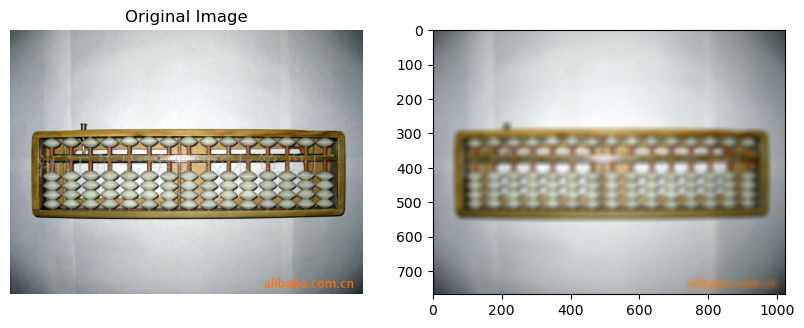

In [27]:
im_folder = '/user_data/vayzenbe/image_sets/development_images/val'

#load a single image annd apply gaussian blue
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms


im = Image.open('/user_data/vayzenbe/image_sets/development_images/val/n02666196/ILSVRC2012_val_00049012.JPEG')

blurrer = transforms.GaussianBlur(kernel_size=21, sigma=10)
blurred_im = blurrer(im)
#blurred_imgs = [blurrer(im) for _ in range(4)]


#plot blurred_imgs to see the effect
plt.figure(figsize=(10, 10))
#plot original image and blurred images side by side
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blurred_im)



In [25]:

transform_ventral = torchvision.transforms.Compose([
                torchvision.transforms.Resize((224,224)),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                 std=[0.229, 0.224, 0.225])])
transform_dorsal = torchvision.transforms.Compose([
                torchvision.transforms.Resize((224,224)),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Grayscale(num_output_channels=3),
                torchvision.transforms.GaussianBlur(kernel_size=35, sigma=15),
                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                 std=[0.229, 0.224, 0.225])])


dataset = two_stream_dataloader.ImageFolderDataset('/user_data/vayzenbe/image_sets/development_images/val', transform_ventral=transform_ventral, transform_dorsal=transform_dorsal)

testloader = torch.utils.data.DataLoader(dataset, batch_size=24, shuffle=False, num_workers = 4, pin_memory=True, drop_last=True)



with torch.no_grad():
    
    for ventral_image, dorsal_image, label in testloader:
        # move tensors to GPU if CUDA is available
        
        ventral_image= ventral_image.cuda()
        dorsal_image = dorsal_image.cuda()
        label = label.cuda()

        
        
        
        out = model(ventral_image,ventral_image)
        print(out.shape)

torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])
torch.Size([24, 565])


In [26]:
ventral_image== dorsal_image

tensor([[[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False,

In [21]:
from classification.model.build import EfficientViT_M0
model = EfficientViT_M0()
#model = torch.nn.DataParallel(model).cuda()
layer_call = "getattr(getattr(getattr(model,'module'),'head'),'bn')"
transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize((224,224)),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                    std=[0.229, 0.224, 0.225])])

In [32]:
model = vonenet.get_model(model_arch='cornets_ff', pretrained=False).module
ventral = model

Neuronal distributions gabor parameters


/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)
/home/vayzenbe/anaconda3/envs/ml/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484775609/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Model:  VOneCORnet-S feedforward


In [35]:
ventral = vonenet.get_model(model_arch='cornets_ff', pretrained=False).module
classifier = nn.Sequential(*list(ventral .children())[-1])
vone  = nn.Sequential(*list(ventral .children())[:-1])
#recomvbine model and classifier
#dorsal = nn.Sequential(dorsal, classifier)

Neuronal distributions gabor parameters


/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)


Model:  VOneCORnet-S feedforward


TypeError: torch.nn.modules.container.Sequential() argument after * must be an iterable, not CORnetSBackEnd_FF

In [62]:
nn.Sequential(*list(ventral.model.children())[:-1])

Sequential(
  (0): CORblock_S(
    (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (nonlin1): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (nonlin2): ReLU(inplace=True)
    (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (nonlin3): ReLU(inplace=True)
    (output): Identity()
    (norm1_0): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (norm2_0): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (norm3_0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): CORblock_S(
    (conv_input): Conv2d(128,

In [63]:
ventral = vonenet.get_model(model_arch='cornets_ff', pretrained=False).module
nn.Sequential(*list(ventral.children())[:-1], nn.Sequential(*list(ventral.model.children())[:-1]),nn.AdaptiveAvgPool2d(output_size=1))

Neuronal distributions gabor parameters


/user_data/vayzenbe/GitHub_Repos/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)


Model:  VOneCORnet-S feedforward


Sequential(
  (0): VOneBlock(
    (simple_conv_q0): GFB()
    (simple_conv_q1): GFB()
    (simple): ReLU(inplace=True)
    (complex): Identity()
    (gabors): Identity()
    (noise): ReLU(inplace=True)
    (output): Identity()
  )
  (1): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (2): Sequential(
    (0): CORblock_S(
      (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (nonlin1): ReLU(inplace=True)
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (nonlin2): ReLU(inplace=True)
      (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (nonlin3): ReLU(inplace=True)
      (output): Identity()
      (nor

In [49]:
#remove classifier layer
classifier = nn.Sequential(*list(ventral.children())[-1])

TypeError: torch.nn.modules.container.Sequential() argument after * must be an iterable, not CORnetSBackEnd_FF

In [50]:
ventral

Sequential(
  (vone_block): VOneBlock(
    (simple_conv_q0): GFB()
    (simple_conv_q1): GFB()
    (simple): ReLU(inplace=True)
    (complex): Identity()
    (gabors): Identity()
    (noise): ReLU(inplace=True)
    (output): Identity()
  )
  (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (model): CORnetSBackEnd_FF(
    (V2): CORblock_S(
      (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (nonlin1): ReLU(inplace=True)
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (nonlin2): ReLU(inplace=True)
      (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (nonlin3): ReLU(inplace=True)
      (

In [28]:
#remove last layer from model
model = EfficientViT_M0()
classifier = nn.Sequential(*list(model.children())[-1])[:-1]
model = nn.Sequential(*list(model.children())[:-1])

#recomvbine model and classifier
model = nn.Sequential(model, classifier)

In [18]:
def extract_acts(model, image_dir, transform, layer_call):
    print('extracting features...')
    

    #set up hook to specified layer
    def _store_feats(layer, inp, output):
        """An ugly but effective way of accessing intermediate model features
        """
        #avgpool = nn.AdaptiveAvgPool2d(output_size=(1,768))
        #output = avgpool(output)
        

        output = output.cpu().numpy()
        print(output.shape)
        
        _model_feats.append(np.reshape(output, (len(output), -1)))

    try:
        m = model.module
    except:
        m = model
    #model_layer = getattr(getattr(m, layer), sublayer)
    model_layer = eval(layer_call)
    model_layer.register_forward_hook(_store_feats)



    #Iterate through each image and extract activations

    imNum = 0
    n=0

    

    
    test_dataset = load_stim.load_stim(image_dir, transform=transform)
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=24, shuffle=False, num_workers = 4, pin_memory=True)
    


    with torch.no_grad():
        
        for data, _ in testloader:
            # move tensors to GPU if CUDA is available
            
            data= data.cuda()
            
            _model_feats = []
            model(data)
            #output = model(data)
            
            out = np.vstack(_model_feats)
            

            if n == 0:
                acts = out
                #label_list = label
            else:
                acts= np.append(acts, out,axis = 0)
                #label_list = np.append(label_list, label)
                
            
            n = n + 1
            break

    return acts

In [19]:
acts = extract_acts(model, '/user_data/vayzenbe/GitHub_Repos/kornet/stim/test/Outline_Black_Filled', transform, layer_call)

extracting features...
(6, 192)
(6, 192)
(6, 192)
(6, 192)


In [10]:
layer_call

"getattr(getattr(getattr(model,'module'),'encoder'),'ln')"

In [11]:
model

DataParallel(
  (module): VisionTransformer(
    (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=768, out_features=3072, bias=True)
            (1): GELU(approximate=none)
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=3072, out_features=768, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_1): Lay

In [ ]:
model

In [10]:
model_arch = ['vonenet_r_ecoset','vonenet_r_stylized-ecoset','vonenet_ff_ecoset','vonenet_ff_stylized-ecoset', 'ShapeNet','SayCam', 'convnext','vit']
model_arch = ['vonenet_ff_ecoset']

#append '_imagenet_sketch' to each string in model_arch
#model_arch = model_arch+ [f'{model}_imagenet_sketch' for model in model_arch]

df = pd.DataFrame(columns=['model','cat','stim_num','features'])
#loop through models and load acts

for model in model_arch:
    act_files = glob(f'{curr_dir}/modelling/acts/{model}_*')

    #remove files with imagenet_sketch
    act_files = [act_file for act_file in act_files if 'imagenet_sketch' not in act_file]
    
    for act_file in act_files:
        act = np.load(act_file)
        cat = act_file.split('/')[-1].split('_')[-1]
        #stim = act_file.split('/')[-1].split('_')[2]
        df = df.append({'model':model,'cat':cat,'stim_num':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)

/tmp/ipykernel_32574/168332372.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model,'cat':cat,'stim_num':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_32574/168332372.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model,'cat':cat,'stim_num':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_32574/168332372.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model,'cat':cat,'stim_num':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_32574/168332372.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

In [8]:
df.reset_index()

,index,model,cat,stim_num,features
0,0,vonenet_ff_ecoset,imagenet,250,512
1,1,vonenet_ff_ecoset,imagenet,30,512
2,2,vonenet_ff_ecoset,imagenet,250,512
3,3,vonenet_ff_ecoset,lamp.npy,500,512
4,4,vonenet_ff_ecoset,guitar.npy,500,512
...,...,...,...,...,...
72,72,vonenet_ff_ecoset,imagenet,250,512
73,73,vonenet_ff_ecoset,bird.npy,500,512
74,74,vonenet_ff_ecoset,imagenet,250,512
75,75,vonenet_ff_ecoset,tree.npy,500,512


In [2]:
act_dir = f'{curr_dir}/modelling/acts'

act_files = glob(f'{act_dir}/*.npy')

#create df to count number values in acts
df = pd.DataFrame(columns=['model','cat','stim','features'])

for act_file in act_files:
    act = np.load(act_file)
    act_name = act_file.split('/')[-1].split('.')[0]
    model_name = act_name.split('_')[0]
    cat = act_name.split('_')[-1]
    
    #add to df
    df = df.append({'model':model_name,'cat':cat,'stim':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
    
    

/tmp/ipykernel_27698/505257728.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model_name,'cat':cat,'stim':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_27698/505257728.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model_name,'cat':cat,'stim':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_27698/505257728.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'model':model_name,'cat':cat,'stim':int(act.shape[0]),'features':int(act.shape[1])},ignore_index=True)
/tmp/ipykernel_27698/505257728.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

In [7]:
source_dir = f'/user_data/vayzenbe/image_sets/ecoset'
im_list = glob(f'{source_dir}/train/*duck/*')
print(im_list[0])

IndexError: list index out of range

In [11]:
path

['/user_data/vayzenbe/image_sets/ecoset/train/0154_bear']

In [2]:
models = ['vonecornet_s','cornet_s','voneresnet', 'vit','convnext','resnet50','resnext50','alexnet','vgg19', 'ShapeNet','SayCam']
weights_dir = f'{curr_dir}/modelling/weights'

In [28]:
def load_model(model_arch):    
    """
    load model
    """
    if model_arch == 'vonecornet_s':
        model = vonenet.get_model(model_arch='cornets', pretrained=True).module
        layer_call = "getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')"
        transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize(224),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                 std=[0.5, 0.5, 0.5])])

    elif model_arch == 'cornet_s':
        model = cornet.get_model('s', pretrained=True).module
        layer_call = "getattr(getattr(getattr(model,'module'),'decoder'),'avgpool')"

        transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize(224),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                 std=[0.229, 0.224, 0.225])])
    
    if model_arch == 'voneresnet':
        model = vonenet.get_model(model_arch='resnet50', pretrained=True).module
        layer_call = "getattr(getattr(getattr(model,'module'),'model'),'avgpool')"
        transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize(224),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                 std=[0.5, 0.5, 0.5])])

    elif model_arch == 'convnext':
        model = convnext_large(weights=ConvNeXt_Large_Weights.DEFAULT)
        transform = ConvNeXt_Large_Weights.IMAGENET1K_V1.transforms()
        layer_call = "getattr(getattr(model,'module'),'avgpool')"

    elif model_arch == 'vit':
        model = vit_b_16(weights=ViT_B_16_Weights.DEFAULT)
        transform = ViT_B_16_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(getattr(model,'module'),'encoder'),'ln')"
        #layer_call = "getattr(getattr(getattr(getattr(getattr(getattr(model,'module'),'encoder'),'layers'),'encoder_layer_11'),'mlp'),'3')"

    elif model_arch == 'resnet50':
        model = resnet50(weights=ResNet50_Weights.DEFAULT)
        transform = ResNet50_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(model,'module'),'avgpool')"
    
    elif model_arch == 'resnext50':
        model = resnext50_32x4d(weights=ResNeXt50_32X4D_Weights.DEFAULT)
        transform = ResNeXt50_32X4D_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(model,'module'),'avgpool')"
    
    elif model_arch == 'alexnet':
        model = alexnet(weights=AlexNet_Weights.DEFAULT)
        transform = AlexNet_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(getattr(model,'module'),'classifier'),'5')"

    elif model_arch == 'vgg19':
        model = vgg19(weights=VGG19_Weights.DEFAULT)
        transform = VGG19_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(getattr(model,'module'),'classifier'),'5')"

    elif model_arch == 'ShapeNet':
        model = resnet50(weights=None)
        checkpoint = torch.load(f'{weights_dir}/ShapeNet_ResNet50_Weights.pth.tar')
        model.load_state_dict(checkpoint)
        transform = ResNet50_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(model,'module'),'avgpool')"

    elif model_arch == 'SayCam':
        model = resnext50_32x4d(weights=None)
        transform = ResNeXt50_32X4D_Weights.DEFAULT.transforms()
        
        checkpoint = torch.load(f'{weights_dir}/SayCam_ResNext_Weights.pth.tar')
        model.load_state_dict(checkpoint)
        layer_call = "getattr(getattr(model,'module'),'avgpool')"

        

    model = torch.nn.DataParallel(model).cuda()

    
    #checkpoint = torch.load(f'{weights_dir}/{model_arch}_{train_set}_best_1.pth.tar')
    #model.load_state_dict(checkpoint['state_dict'])

    return model, transform, layer_call

In [34]:
model, transform, layer_call = load_model('vonecornet_s')
print(layer_call)

Neuronal distributions gabor parameters
Model:  VOneCORnet-S
getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')


In [35]:
model

DataParallel(
  (module): Sequential(
    (vone_block): VOneBlock(
      (simple_conv_q0): GFB()
      (simple_conv_q1): GFB()
      (simple): ReLU(inplace=True)
      (complex): Identity()
      (gabors): Identity()
      (noise): ReLU(inplace=True)
      (output): Identity()
    )
    (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (model): CORnetSBackEnd(
      (V2): CORblock_S(
        (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (nonlin1): ReLU(inplace=True)
        (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (nonlin2): ReLU(inplace=True)
        (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=

In [36]:
layer = eval(layer_call)

In [38]:

for model_name in models:
    print(model_name)
    try:
        model, transform, layer_call = load_model(model_name)
        
        
        
    except:
        print(model_name, 'failed to load')


    try:
        model_layer = eval(layer_call)

    except:
        print(model_name, 'eval failed')
        

    



vonecornet_s
Neuronal distributions gabor parameters
Model:  VOneCORnet-S
cornet_s
voneresnet
Neuronal distributions gabor parameters
Model:  VOneResnet50
vit
convnext
resnet50
resnext50
alexnet
vgg19
ShapeNet
SayCam


In [5]:
model

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): S

In [9]:
layer_call = "getattr(getattr(model,'module'),'avgpool')"


In [4]:
layer = eval(layer_call)

In [6]:
models = ['ShapeNet','SayCam']
for model in models:
    print(model)

    model, transform, layer_call = load_model(model)

    print(model)



ShapeNet
DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequentia

In [17]:
model = cornet.get_model('s', pretrained=True)

In [20]:
layer_call = "getattr(getattr(getattr(model,'module'),'decoder'),'avgpool')"
model_layer = eval(layer_call)

In [18]:
model.module.decoder.avgpool

AdaptiveAvgPool2d(output_size=1)

In [15]:
test = 'cornetsdfdsfds'

test == 'cornets*'

False

In [16]:
'cornet' in test

True

In [2]:
curr_dir = '/user_data/vayzenbe/GitHub_Repos/kornet'
stim_dir = f'{curr_dir}/stim/_things'


layer = ['ln','avgpool','avgpool',['decoder','avgpool']]


In [3]:
cats = glob(f'{stim_dir}/*/')
cats

['/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/butterfly/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/dog/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/lamp/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/bike/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/truck/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/fish/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/duck/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/bear/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/elephant/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/turtle/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/key/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/squirrel/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/frog/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/hand/',
 '/user_data/vayzenbe/GitHub_Repos/kornet/stim/_things/spoon/',
 '/user_data/vayzenbe/GitHub_Repos/korne

In [13]:
def load_model(model_arch):    
    """
    load model
    """
    if model_arch == 'cornets':
        model = vonenet.get_model(model_arch='cornets', pretrained=False).module
        layer_call = "getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')"

    elif model_arch == 'cornets_ff':
        model = vonenet.get_model(model_arch='cornets_ff', pretrained=False).module
        layer_call = "getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')"
        

    elif model_arch == 'convnext':
        model = convnext_large(weights=None)
        transform = ConvNeXt_Large_Weights.IMAGENET1K_V1.transforms()
        layer_call = "getattr(getattr(model,'module'),'avgpool')"
    elif model_arch == 'vit':
        model = vit_b_16(weights=None)
        transform = ViT_B_16_Weights.DEFAULT.transforms()
        layer_call = "getattr(getattr(getattr(model,'module'),'encoder'),'ln')"
        layer_call = "getattr(getattr(model, 'encoder'),'ln')"
        #layer_call = "getattr(getattr(getattr(getattr(getattr(getattr(model,'module'),'encoder'),'layers'),'encoder_layer_11'),'mlp'),'3')"


    if model_arch == 'cornets' or model_arch == 'cornets_ff':

        transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize(256),
                torchvision.transforms.CenterCrop(224),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                 std=[0.5, 0.5, 0.5]),
            ])

    #model = torch.nn.DataParallel(model).cuda()

    
    #checkpoint = torch.load(f'{weights_dir}/{model_arch}_{train_set}_best_1.pth.tar')
    #model.load_state_dict(checkpoint['state_dict'])

    return model, transform, layer_call

In [3]:
transform = torchvision.transforms.Compose([
                torchvision.transforms.Resize(256),
                torchvision.transforms.CenterCrop(224),
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                 std=[0.5, 0.5, 0.5]),
            ])

image_dir = '/user_data/vayzenbe/GitHub_Repos/kornet/stim/test/Outline'
test_dataset = load_stim.load_stim(image_dir, transform=transform)

['OBJ (01).png', 'OBJ (04).png', 'OBJ (06).png', 'OBJ (07).png', 'OBJ (08).png', 'OBJ (10).png', 'OBJ (11).png', 'OBJ (12).png', 'OBJ (14).png', 'OBJ (16).png', 'OBJ (17).png', 'OBJ (18).png', 'OBJ (19).png', 'OBJ (20).png', 'OBJ (21).png', 'OBJ (22).png', 'OBJ (23).png', 'OBJ (25).png', 'OBJ (27).png', 'OBJ (29).png', 'OBJ (30).png', 'OBJ (31).png', 'OBJ (32).png', 'OBJ (38).png', 'OBJ (41).png', 'OBJ (42).png', 'OBJ (44).png', 'OBJ (45).png', 'OBJ (46).png', 'OBJ (47).png']


In [17]:
cat = 'airplane'
#['vit','convnext','cornets','cornets_ff']
for model_type in ['vit']:
    model, transform, layer_call = load_model(model_type)
    acts = extract_acts(model, f'{stim_dir}/{cat}', transform, layer_call)

    print(acts.shape)


extracting features...
(12, 197, 768)
(12, 151296)


In [19]:
model

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate=none)
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_att

In [31]:
151296/768

197.0

In [40]:
768 * 16

12288

In [6]:
cat = 'airplane'


acts = extract_acts(model, f'{stim_dir}/{cat}', transform)


extracting features...


In [7]:
acts.shape

(12, 512)

In [38]:
try:
    m = model.module
except:
    m = model
getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')
#model_layer.register_forward_hook(_store_feats)

AdaptiveAvgPool2d(output_size=1)

In [37]:
getattr(getattr(getattr(getattr(model,'module'),'model'),'decoder'),'avgpool')

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_item_by_idx',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replic

In [30]:
model

DataParallel(
  (module): Sequential(
    (vone_block): VOneBlock(
      (simple_conv_q0): GFB()
      (simple_conv_q1): GFB()
      (simple): ReLU(inplace=True)
      (complex): Identity()
      (gabors): Identity()
      (noise): ReLU(inplace=True)
      (output): Identity()
    )
    (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (model): CORnetSBackEnd(
      (V2): CORblock_S(
        (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (nonlin1): ReLU(inplace=True)
        (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (nonlin2): ReLU(inplace=True)
        (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=

In [27]:
class Person:
    age = 23
    name = "Adam"

person = Person()
print('The age is:', getattr(person, "age"))

The age is: 23


In [28]:
dir(person)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'name']

In [9]:
layer = 'decoder'
sublayer = 'avgpool'

#set up hook to specified layer
def _store_feats(layer, inp, output):
    """An ugly but effective way of accessing intermediate model features
    """
    
    output = output.cpu().numpy()
    
    _model_feats.append(np.reshape(output, (len(output), -1)))

try:
    m = model.module
except:
    m = model
model_layer = getattr(getattr(m, layer), sublayer)
model_layer.register_forward_hook(_store_feats)


_model_feats = []
model(im)
model_feats.append(_model_feats[time_step])

In [16]:
nn.Sequential(*list(model.children[0][:,-1]))

TypeError: 'method' object is not subscriptable

In [17]:
model

DataParallel(
  (module): Sequential(
    (vone_block): VOneBlock(
      (simple_conv_q0): GFB()
      (simple_conv_q1): GFB()
      (simple): ReLU(inplace=True)
      (complex): Identity()
      (gabors): Identity()
      (noise): ReLU(inplace=True)
      (output): Identity()
    )
    (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (model): CORnetSBackEnd(
      (V2): CORblock_S(
        (conv_input): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (skip): Conv2d(128, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (norm_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (nonlin1): ReLU(inplace=True)
        (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (nonlin2): ReLU(inplace=True)
        (conv3): Conv2d(512, 128, kernel_size=(1, 1), stride=

In [8]:
print(convnext)

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((192,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
          (1): Permute()
          (2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=192, out_features=768, bias=True)
          (4): GELU(approximate=none)
          (5): Linear(in_features=768, out_features=192, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
          (1): Permute()
          (2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in